# DATA PREPROCESSING


         Date         Open         High          Low        Close  \
0  2023-03-15  1705.189941  1721.079224  1616.630371  1656.180542   
1  2023-03-16  1656.332031  1693.139282  1639.261719  1677.215454   
2  2023-03-17  1677.296753  1799.343994  1667.131836  1792.485107   
3  2023-03-18  1793.592407  1840.357544  1751.262817  1761.659668   
4  2023-03-19  1762.963257  1843.844116  1762.963257  1785.576538   

     Adj Close       Volume  
0  1656.180542  12715339905  
1  1677.215454   9364980166  
2  1792.485107  12467445117  
3  1761.659668  10317822213  
4  1785.576538   9170565472  
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
              Open         High          Low        Close    Adj Close  \
count   367.000000   367.000000   367.000000   367.000000   367.000000   
mean   2043.881271  2083.184766  2008.420266  2049.268613  2049.268613   
std     481.802510   502.654046   463.115810   489.014002   489.0

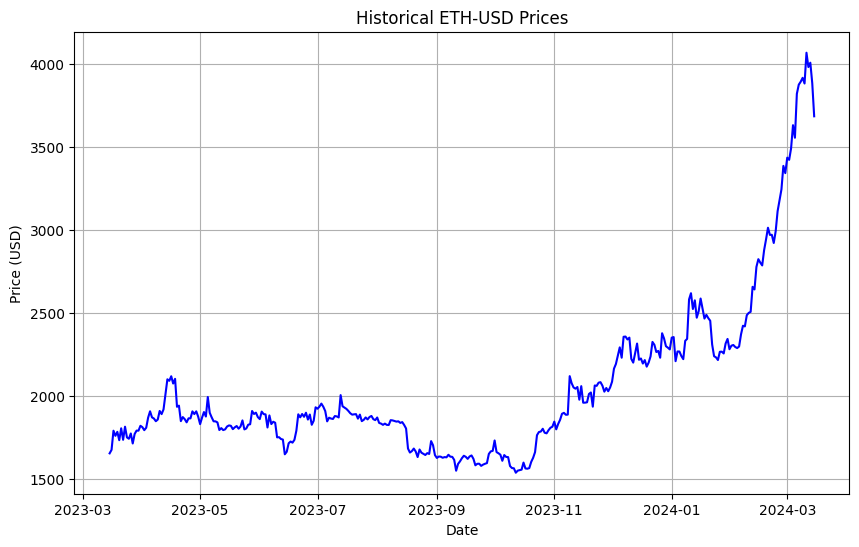

In [17]:
import pandas as pd

eth_data = pd.read_csv('ETH-USD.csv')


print(eth_data.head())

# Check for missing values
print(eth_data.isnull().sum())


eth_data['Date'] = pd.to_datetime(eth_data['Date'])

print(eth_data.describe())

# Plot the historical price data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(eth_data['Date'], eth_data['Close'], color='blue')
plt.title('Historical ETH-USD Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


# ETHEREUM PRICE PREDICTION

**ARIMA MODEL**

**PMDARIMA LIBRARY:**
> used to find the best order for arima model

In [18]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00


In [115]:
import pandas as pd
from pmdarima import auto_arima

# Load Ethereum dataset
ethereum_data = pd.read_csv('ETH-USD.csv')

# Extract the 'Close' prices
prices = ethereum_data['Close']

# Fit auto ARIMA model
model = auto_arima(prices, seasonal=False, trace=True)

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=4235.691, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=4068.996, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4233.712, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=4021.847, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=4015.785, Time=0.12 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=3986.631, Time=0.35 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3980.359, Time=0.42 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=3978.494, Time=0.23 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=3984.765, Time=0.07 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=3948.905, Time=0.85 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=3952.528, T


**ARIMA MODEL**

> Building Arima model with the best order found

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

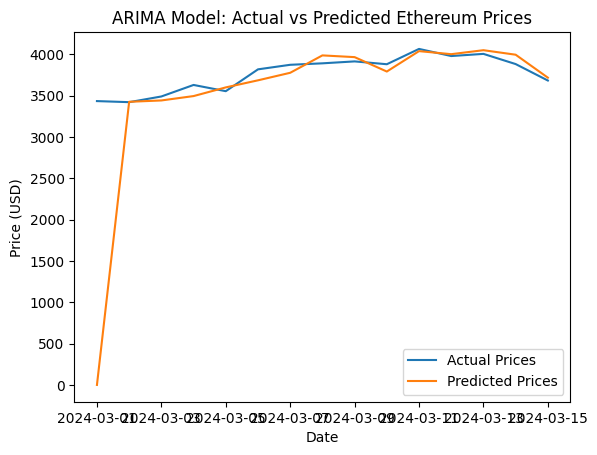

In [151]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
eth_data = pd.read_csv('ETH-USD.csv')
eth_data['Date'] = pd.to_datetime(eth_data['Date'])
eth_data.set_index('Date', inplace=True)

# Select 'Close' prices as the target variable
target_variable = 'Close'
dataset = eth_data[target_variable]

# Specify the period for prediction
start_date = '2024-03-01'
end_date = '2024-03-15'

# Extract the subset of data for the specified period
subset_data = dataset.loc[start_date:end_date]

# Fit the ARIMA model
model = ARIMA(subset_data, order=(3,1,2))  # Example order (p, d, q)
fitted_model = model.fit()

# Generate predictions
predictions = fitted_model.predict(start=start_date, end=end_date)

# Plot actual and predicted prices
plt.plot(subset_data.index, subset_data.values, label='Actual Prices')
plt.plot(predictions.index, predictions.values, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('ARIMA Model: Actual vs Predicted Ethereum Prices')
plt.legend()
plt.show()


**SAMPLE PRICE PREDICTION FOR THE MODEL FROM MARCH 1 2024 TO MARCH 15 2024**

In [154]:
# Generate predictions
predictions = fitted_model.predict(start='2024-03-02', end=end_date, typ='levels')

# Print predicted and actual values
print("Date\t\tPredicted Price\t\tActual Price")
for date, pred_price, actual_price in zip(predictions.index, predictions.values, subset_data.values):
    print(f"{date}\t{pred_price:.2f}\t\t{actual_price:.2f}")


Date		Predicted Price		Actual Price
2024-03-02 00:00:00	3426.48		3435.05
2024-03-03 00:00:00	3442.76		3422.05
2024-03-04 00:00:00	3495.82		3490.99
2024-03-05 00:00:00	3600.75		3630.43
2024-03-06 00:00:00	3686.42		3554.96
2024-03-07 00:00:00	3777.64		3819.23
2024-03-08 00:00:00	3988.07		3874.35
2024-03-09 00:00:00	3967.10		3892.06
2024-03-10 00:00:00	3792.73		3915.42
2024-03-11 00:00:00	4039.77		3881.19
2024-03-12 00:00:00	4002.86		4066.45
2024-03-13 00:00:00	4051.00		3980.27
2024-03-14 00:00:00	3996.37		4006.46
2024-03-15 00:00:00	3718.69		3883.14


**RMS VALUE OF THE MODEL**

In [157]:
# Adjust the end date to match the last date in the subset of data
from sklearn.metrics import mean_squared_error
end_date = subset_data.index[-1]

# Generate predictions using the adjusted end date
predictions = fitted_model.predict(start=start_date, end=end_date, typ='levels')
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(subset_data[1:], predictions[1:]))
print("RMSE:", rmse)


RMSE: 53.13495122422672


**PREDICTED VALUES FOR ETHEREUM USING ARIMA MODEL**

In [159]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
eth_data = pd.read_csv('ETH-USD.csv')
eth_data['Date'] = pd.to_datetime(eth_data['Date'])
eth_data.set_index('Date', inplace=True)

# Select 'Close' prices as the target variable
target_variable = 'Close'
dataset = eth_data[target_variable]

# Specify the period for prediction
start_date = '2023-03-15'
end_date = '2024-03-15'
forecast_start_date = '2024-03-15'
forecast_end_date = '2024-03-23'

# Extract the subset of data for the specified period
subset_data = dataset.loc[start_date:end_date]

# Fit the ARIMA model
model = ARIMA(subset_data, order=(3,1,2))  # Example order (p, d, q)
fitted_model = model.fit()

# Generate predictions for the specified period
predictions = fitted_model.predict(start=forecast_start_date, end=forecast_end_date)

# Print predicted values
print("Predicted Prices from", forecast_start_date, "to", forecast_end_date)
print(predictions)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Predicted Prices from 2024-03-15 to 2024-03-23
2024-03-15    3869.348138
2024-03-16    3700.950917
2024-03-17    3655.402000
2024-03-18    3660.598356
2024-03-19    3671.814804
2024-03-20    3653.825359
2024-03-21    3666.971565
2024-03-22    3662.426231
2024-03-23    3659.901479
Freq: D, Name: predicted_mean, dtype: float64


# Arbitrum
**ARIMA MODEL**

**PMDARIMA LIBRARY:**
> used to find the best order for arima model



In [170]:
import pandas as pd
from pmdarima import auto_arima

# Load Ethereum dataset
arb_data = pd.read_csv('ARB-USD.csv')

# Extract the 'Close' prices
prices = arb_data['Close']

# Fit auto ARIMA model
model = auto_arima(prices, seasonal=False, trace=True)

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-979.044, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-979.339, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-977.402, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-977.402, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-981.116, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-975.402, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.649 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  359
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 491.558
Date:                Fri, 15 Mar 2024   AIC                           -981.116
Time:                        17:43:35   BIC                           -977.236
Sample:                             0   HQIC                          -979.573
          


**ARIMA MODEL**

> Building Arima model with the best order found

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Lik

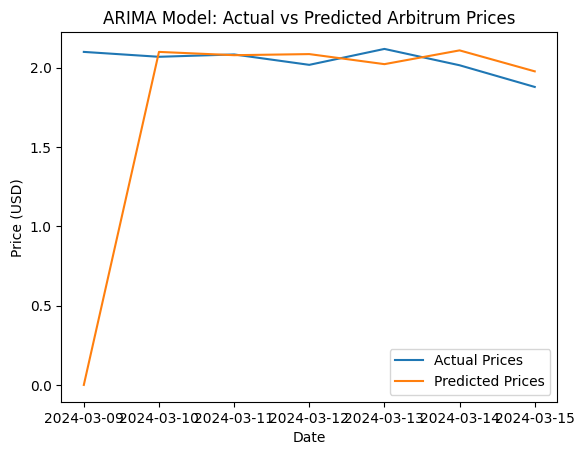

In [171]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the dataset
arb_data = pd.read_csv('ARB-USD.csv')
arb_data['Date'] = pd.to_datetime(arb_data['Date'])
arb_data.set_index('Date', inplace=True)

# Select 'Close' prices as the target variable
target_variable = 'Close'
dataset = arb_data[target_variable]

# Specify the period for prediction
start_date = '2024-03-09'
end_date = '2024-03-15'

# Extract the subset of data for the specified period
subset_data = dataset.loc[start_date:end_date]

# Fit the ARIMA model
model = ARIMA(subset_data, order=(3,1,2))  # Example order (p, d, q)
fitted_model = model.fit()

# Generate predictions
predictions = fitted_model.predict(start=start_date, end=end_date)

# Plot actual and predicted prices
plt.plot(subset_data.index, subset_data.values, label='Actual Prices')
plt.plot(predictions.index, predictions.values, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('ARIMA Model: Actual vs Predicted Arbitrum Prices')
plt.legend()
plt.show()


**SAMPLE PRICE PREDICTION FOR THE MODEL FROM MARCH 1 2024 TO MARCH 15 2024**

In [173]:
# Generate predictions
start_date='2024-03-01'
end_date='2024-03-15'
predictions = fitted_model.predict(start=start_date, end=end_date, typ='levels')
subset_data = dataset.loc[start_date:end_date]
# Print predicted and actual values

print("Date\t\tPredicted Price\t\tActual Price")
for date, pred_price, actual_price in zip(predictions.index, predictions.values, subset_data.values):
    print(f"{date}\t{pred_price:.2f}\t\t{actual_price:.2f}")


Date		Predicted Price		Actual Price
2024-03-01 00:00:00	1.95		1.99
2024-03-02 00:00:00	1.99		2.02
2024-03-03 00:00:00	2.02		2.05
2024-03-04 00:00:00	2.04		1.98
2024-03-05 00:00:00	1.99		1.97
2024-03-06 00:00:00	1.97		2.05
2024-03-07 00:00:00	2.06		2.17
2024-03-08 00:00:00	2.17		2.14
2024-03-09 00:00:00	2.14		2.10
2024-03-10 00:00:00	2.08		2.07
2024-03-11 00:00:00	2.07		2.08
2024-03-12 00:00:00	2.10		2.02
2024-03-13 00:00:00	2.03		2.12
2024-03-14 00:00:00	2.11		2.01
2024-03-15 00:00:00	2.01		1.88


**MODEL EVALUATION USING RMSE**

In [174]:
# Adjust the end date to match the last date in the subset of data
from sklearn.metrics import mean_squared_error
end_date = subset_data.index[-1]

# Generate predictions using the adjusted end date
predictions = fitted_model.predict(start=start_date, end=end_date, typ='levels')
# Calculate RMSE

rmse = np.sqrt(mean_squared_error(subset_data[1:], predictions[1:]))
print("RMSE:", rmse)


RMSE: 0.07044173888045961


**THE PREDICTED VALUES ARE:**

In [172]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
arb_data = pd.read_csv('ARB-USD.csv')
arb_data['Date'] = pd.to_datetime(arb_data['Date'])
arb_data.set_index('Date', inplace=True)

# Select 'Close' prices as the target variable
target_variable = 'Close'
dataset = link_data[target_variable]

# Specify the period for prediction
start_date = '2023-03-23'
end_date = '2024-03-15'
forecast_start_date = '2024-03-15'
forecast_end_date = '2024-03-23'

# Extract the subset of data for the specified period
subset_data = dataset.loc[start_date:end_date]

# Fit the ARIMA model
model = ARIMA(subset_data, order=(3,1,2))  # Example order (p, d, q)
fitted_model = model.fit()

# Generate predictions for the specified period
predictions = fitted_model.predict(start=forecast_start_date, end=forecast_end_date)

# Print predicted values
print("Predicted Prices from", forecast_start_date, "to", forecast_end_date)
print(predictions)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Predicted Prices from 2024-03-15 to 2024-03-23
2024-03-15    2.010968
2024-03-16    1.874259
2024-03-17    1.879713
2024-03-18    1.895239
2024-03-19    1.896381
2024-03-20    1.883908
2024-03-21    1.877614
2024-03-22    1.885405
2024-03-23    1.894020
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# CHAINLINK


Finding the best Order for Arima model

In [175]:
import pandas as pd
from pmdarima import auto_arima

# Load Ethereum dataset
link_data = pd.read_csv('LINK-USD.csv')

# Extract the 'Close' prices
prices = link_data['Close']

# Fit auto ARIMA model
model = auto_arima(prices, seasonal=False, trace=True)

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=498.449, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=493.622, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=492.682, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=492.562, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=493.574, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=494.530, Time=0.95 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=494.511, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=492.993, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 4.850 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  367
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -243.281
Date:                Fri, 15 Mar 2024   AIC                   

**SAMPLE PREDICTION FOR PRICES FROM 1 MARCH 2024 to 15 MARCH 2024**

In [179]:
# Generate predictions
start_date='2024-03-01'
end_date='2024-03-15'
predictions = fitted_model.predict(start=start_date, end=end_date, typ='levels')

# Extract the subset of actual prices for the same date range as predictions
subset_actual_data = dataset.loc[start_date:end_date]

# Print predicted and actual values
print("Date\t\tPredicted Price\t\tActual Price")
for date, pred_price, actual_price in zip(predictions.index, predictions.values, subset_actual_data.values):
    print(f"{date}\t{pred_price:.2f}\t\t{actual_price:.2f}")


Date		Predicted Price		Actual Price
2024-03-01 00:00:00	19.27		20.06
2024-03-02 00:00:00	20.16		21.42
2024-03-03 00:00:00	21.17		20.51
2024-03-04 00:00:00	20.66		20.45
2024-03-05 00:00:00	20.40		19.01
2024-03-06 00:00:00	19.10		20.08
2024-03-07 00:00:00	20.05		20.13
2024-03-08 00:00:00	20.14		19.74
2024-03-09 00:00:00	19.65		20.03
2024-03-10 00:00:00	20.17		21.75
2024-03-11 00:00:00	21.56		21.29
2024-03-12 00:00:00	21.30		20.67
2024-03-13 00:00:00	20.72		20.77
2024-03-14 00:00:00	20.76		20.91
2024-03-15 00:00:00	20.91		19.19


**EVALUATION OF MODEL USING RMSE**

In [181]:
# Adjust the end date to match the last date in the subset of data
from sklearn.metrics import mean_squared_error
end_date = subset_data.index[-1]
subset_data = dataset.loc[start_date:end_date]
# Generate predictions using the adjusted end date
predictions = fitted_model.predict(start=start_date, end=end_date, typ='levels')
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(subset_data[1:], predictions[1:]))
print("RMSE:", rmse)


RMSE: 0.8953794404460544


# The Predicted Values are:

In [182]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
link_data = pd.read_csv('LINK-USD.csv')
link_data['Date'] = pd.to_datetime(link_data['Date'])
link_data.set_index('Date', inplace=True)

# Select 'Close' prices as the target variable
target_variable = 'Close'
dataset = link_data[target_variable]

# Specify the period for prediction
start_date = '2023-03-15'
end_date = '2024-03-15'
forecast_start_date = '2024-03-15'
forecast_end_date = '2024-03-23'

# Extract the subset of data for the specified period
subset_data = dataset.loc[start_date:end_date]

# Fit the ARIMA model
model = ARIMA(subset_data, order=(3,1,2))  # Example order (p, d, q)
fitted_model = model.fit()

# Generate predictions for the specified period
predictions = fitted_model.predict(start=forecast_start_date, end=forecast_end_date)

# Print predicted values
print("Predicted Prices from", forecast_start_date, "to", forecast_end_date)
print(predictions)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Predicted Prices from 2024-03-15 to 2024-03-23
2024-03-15    20.912637
2024-03-16    19.249154
2024-03-17    19.274540
2024-03-18    19.352930
2024-03-19    19.193721
2024-03-20    19.363129
2024-03-21    19.253276
2024-03-22    19.264753
2024-03-23    19.346586
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
